In [167]:
# -*- coding: utf-8 -*-

import os
import sys
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import datetime


# root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
# sys.path.append(root + '/python')

import ccxt  # noqa: E402



In [4]:
#Exchanges

print('CCXT Version:', ccxt.__version__)

for exchange_id in ccxt.exchanges:
    try:
        exchange = getattr(ccxt, exchange_id)()
        print(exchange_id)
        # do what you want with this exchange
        # pprint(dir(exchange))
    except Exception as e:
        print(e)

CCXT Version: 4.0.90
ace
alpaca
ascendex
bequant
bigone
binance
binancecoinm
binanceus
binanceusdm
bingx
bit2c
bitbank
bitbay
bitbns
bitcoincom
bitfinex
bitfinex2
bitflyer
bitforex
bitget
bithumb
bitmart
bitmex
bitopro
bitpanda
bitrue
bitso
bitstamp
bitstamp1
bittrex
bitvavo
bkex
bl3p
blockchaincom
btcalpha
btcbox
btcmarkets
btctradeua
btcturk
bybit
cex
coinbase
coinbaseprime
coinbasepro
coincheck
coinex
coinfalcon
coinmate
coinone
coinsph
coinspot
cryptocom
currencycom
delta
deribit
digifinex
exmo
fmfwio
gate
gateio
gemini
hitbtc
hitbtc3
hollaex
huobi
huobijp
huobipro
idex
independentreserve
indodax
kraken
krakenfutures
kucoin
kucoinfutures
kuna
latoken
lbank
lbank2
luno
lykke
mercado
mexc
mexc3
ndax
novadax
oceanex
okcoin
okex
okex5
okx
paymium
phemex
poloniex
poloniexfutures
probit
tidex
timex
tokocrypto
upbit
wavesexchange
wazirx
whitebit
woo
yobit
zaif
zonda


In [83]:
import ccxt
import pandas
import datetime
import time

ex = ccxt.kucoin()

def ohlcv_info():
    x = ex.fetch_ohlcv('BTC/USDT', '1d', limit=20, since=since)
    df = pandas.DataFrame(x, columns=['TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME'])
    df['TIME'] = pandas.to_datetime(df['TIME'], unit='ms')
    print(f'*** {datetime.datetime.now()} ***\n {df.tail(1)}\n')
    time.sleep(5)

for i in range(5):
    ohlcv_info()


*** 2023-09-17 15:58:16.967498 ***
 Empty DataFrame
Columns: [TIME, OPEN, HIGH, LOW, CLOSE, VOLUME]
Index: []

*** 2023-09-17 15:58:22.357017 ***
 Empty DataFrame
Columns: [TIME, OPEN, HIGH, LOW, CLOSE, VOLUME]
Index: []



KeyboardInterrupt: 

In [84]:
#get all pairs of an exchange
exchange = ccxt.binance()
markets = exchange.load_markets()
pprint(markets.keys())


dict_keys(['ETH/BTC', 'LTC/BTC', 'BNB/BTC', 'NEO/BTC', 'QTUM/ETH', 'EOS/ETH', 'SNT/ETH', 'BNT/ETH', 'BCC/BTC', 'GAS/BTC', 'BNB/ETH', 'BTC/USDT', 'ETH/USDT', 'HSR/BTC', 'OAX/ETH', 'DNT/ETH', 'MCO/ETH', 'ICN/ETH', 'MCO/BTC', 'WTC/BTC', 'WTC/ETH', 'LRC/BTC', 'LRC/ETH', 'QTUM/BTC', 'YOYOW/BTC', 'OMG/BTC', 'OMG/ETH', 'ZRX/BTC', 'ZRX/ETH', 'STRAT/BTC', 'STRAT/ETH', 'SNGLS/BTC', 'SNGLS/ETH', 'BQX/BTC', 'BQX/ETH', 'KNC/BTC', 'KNC/ETH', 'FUN/BTC', 'FUN/ETH', 'SNM/BTC', 'SNM/ETH', 'NEO/ETH', 'IOTA/BTC', 'IOTA/ETH', 'LINK/BTC', 'LINK/ETH', 'XVG/BTC', 'XVG/ETH', 'SALT/BTC', 'SALT/ETH', 'MDA/BTC', 'MDA/ETH', 'MTL/BTC', 'MTL/ETH', 'SUB/BTC', 'SUB/ETH', 'EOS/BTC', 'SNT/BTC', 'ETC/ETH', 'ETC/BTC', 'MTH/BTC', 'MTH/ETH', 'ENG/BTC', 'ENG/ETH', 'DNT/BTC', 'ZEC/BTC', 'ZEC/ETH', 'BNT/BTC', 'AST/BTC', 'AST/ETH', 'DASH/BTC', 'DASH/ETH', 'OAX/BTC', 'ICN/BTC', 'BTG/BTC', 'BTG/ETH', 'EVX/BTC', 'EVX/ETH', 'REQ/BTC', 'REQ/ETH', 'VIB/BTC', 'VIB/ETH', 'HSR/ETH', 'TRX/BTC', 'TRX/ETH', 'POWR/BTC', 'POWR/ETH', 'ARK/BTC

In [95]:
#get the first date of the exchange
#exchange = ccxt.binance()
#markets = exchange.load_markets()
pprint(exchange.safe_value(markets,markets.keys() ))


TypeError: unhashable type: 'dict_keys'

In [112]:
dt = ['20230916']
since = calendar.timegm(dt.utctimetuple())*1000

AttributeError: 'list' object has no attribute 'utctimetuple'

In [149]:


#Get the last 200 days of data for BTC/USDT and then get the first date and then redo the process for the previous 200 days and so on
#until you reach the first date of the exchange
def get_ohlcv_200_days(exchange):
    #exchange = ccxt.binance()
    since = None
    df_ohlcv = pd.DataFrame()
    while True:
        ohlcv = exchange.fetch_ohlcv('BTC/USDT', '1d', limit=200, since=since)
        #print(ohlcv)
        df = pd.DataFrame(ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
        df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
        df['Open'] = df['Open'].astype(np.float64)
        df['High'] = df['High'].astype(np.float64)
        df['Low'] = df['Low'].astype(np.float64)
        df['Close'] = df['Close'].astype(np.float64)
        df['Volume'] = df['Volume'].astype(np.float64)
        df.set_index('Time', inplace=True)
        df_ohlcv = df_ohlcv.append(df)
        #check if df and df_ohlcv have at least one common date
        
        if len(df_ohlcv[df_ohlcv.index.duplicated()]) ==0:
            #convert the first date of the dataframe to timestamp and subtract 200 days
            since = int(df.index[0].timestamp()*1000 - 200*24*60*60*1000)
            #print(since)
        else:
            break
    df_ohlcv.sort_index(inplace=True)
    #delete the duplicated dates
    df_ohlcv = df_ohlcv[~df_ohlcv.index.duplicated(keep='first')]
    return df_ohlcv


In [140]:
#check if df and df_ohlcv have at least one common date
df_ohlcv.index.isin(df.index).any()

True

In [144]:
df_ohlcv = df_ohlcv[~df_ohlcv.index.duplicated(keep='first')]

<AxesSubplot:xlabel='Time'>

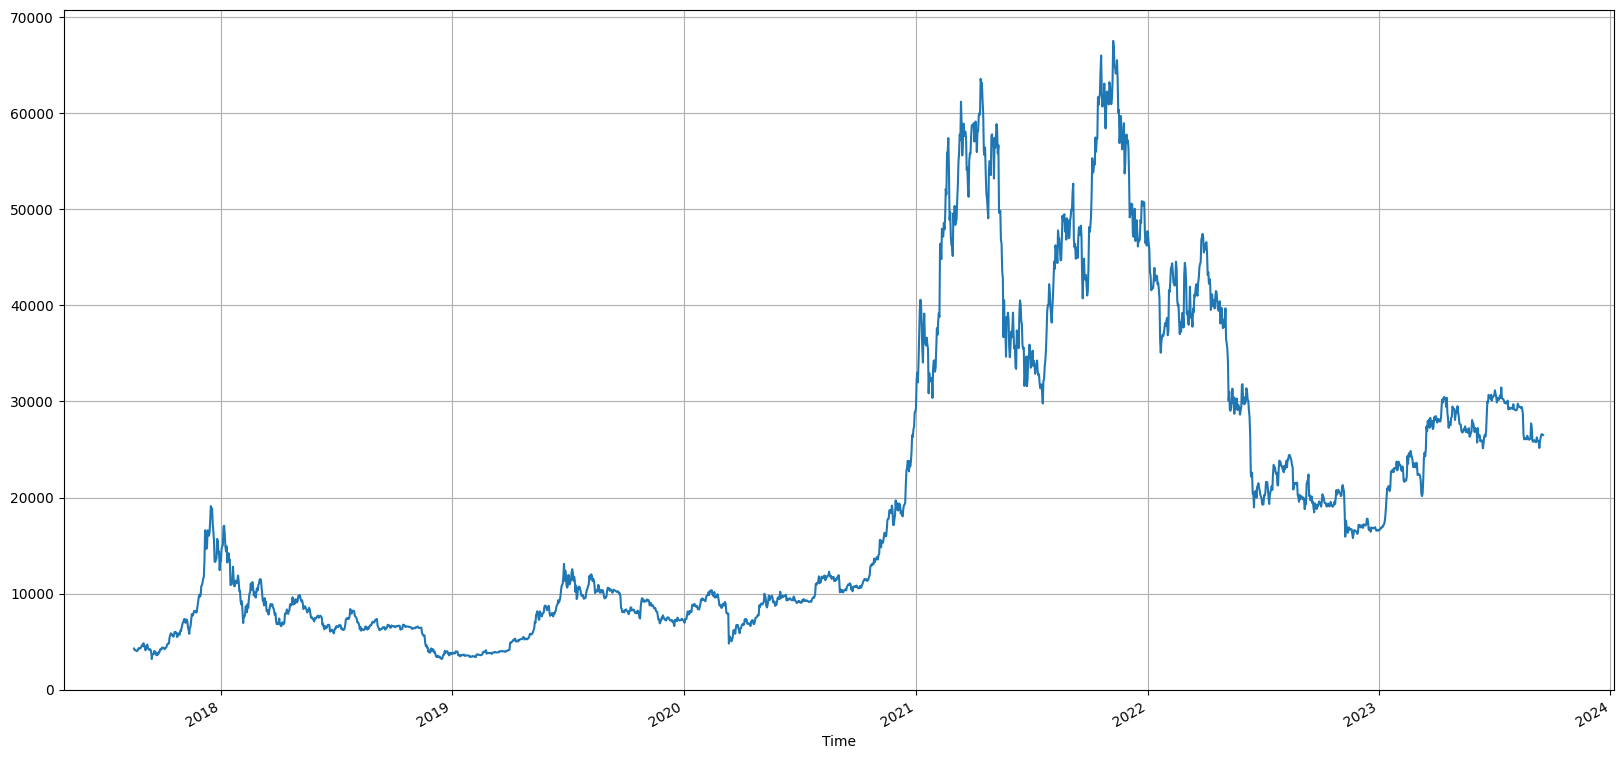

In [145]:
df_ohlcv["Close"].plot(figsize=(20,10), grid=True)

In [117]:
#convert this date to gmt
date = int(df.index[0].timestamp()*1000 - 200*24*60*60*1000)
print(datetime.fromtimestamp(date/1000))



2022-08-13 18:00:00


In [6]:
import ccxt
import calendar
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta

exchange = ccxt.binance()

def min_ohlcv(dt, pair, limit):
    # UTC native object
    since = calendar.timegm(dt.utctimetuple())*1000
    ohlcv1 = exchange.fetch_ohlcv(symbol=pair, timeframe='1m', since=since, limit=limit)
    ohlcv2 = exchange.fetch_ohlcv(symbol=pair, timeframe='1m', since=since, limit=limit)
    ohlcv = ohlcv1 + ohlcv2
    return ohlcv

def ohlcv(dt, pair, period='1d'):
    ohlcv = []
    limit = 1000
    if period == '1m':
        limit = 720
    elif period == '1d':
        limit = 365
    elif period == '1h':
        limit = 24
    elif period == '5m':
        limit = 288
    for i in dt:
        start_dt = datetime.strptime(i, "%Y%m%d")
        since = calendar.timegm(start_dt.utctimetuple())*1000
        if period == '1m':
            ohlcv.extend(min_ohlcv(start_dt, pair, limit))
        else:
            ohlcv.extend(exchange.fetch_ohlcv(symbol=pair, timeframe=period, since=since, limit=limit))
    df = pd.DataFrame(ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
    df['Open'] = df['Open'].astype(np.float64)
    df['High'] = df['High'].astype(np.float64)
    df['Low'] = df['Low'].astype(np.float64)
    df['Close'] = df['Close'].astype(np.float64)
    df['Volume'] = df['Volume'].astype(np.float64)
    df.set_index('Time', inplace=True)
    return df

dt = ['20180101', '20200101']
df = ohlcv(dt, 'ETH/BTC', '1d')

In [22]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2017-12-31 22:00:00,0.053586,0.057200,0.053401,0.056367,312440.757
2018-01-01 22:00:00,0.056368,0.066265,0.051040,0.058261,492006.759
2018-01-02 22:00:00,0.058300,0.064210,0.056449,0.062600,469486.617
2018-01-03 22:00:00,0.062600,0.070000,0.060125,0.062236,595991.613
2018-01-04 22:00:00,0.062449,0.069758,0.054000,0.056584,710527.221
...,...,...,...,...,...
2020-12-25 21:00:00,0.025364,0.025506,0.023888,0.024055,316895.770
2020-12-26 21:00:00,0.024055,0.026500,0.022754,0.026057,732496.121
2020-12-27 21:00:00,0.026059,0.027666,0.025760,0.026967,612564.014


In [9]:
# consecutive days for ohlcv function
from datetime import datetime, date, timedelta

start_day = "20190101"
start_dt = datetime.strptime(start_day, "%Y%m%d")
end_day = "20190831"
end_dt = datetime.strptime(end_day, "%Y%m%d")
days_num = (end_dt - start_dt).days + 1
datelist = [start_dt + timedelta(days=x) for x in range(days_num)]
datelist = [date.strftime("%Y%m%d") for date in datelist]

df = ohlcv(datelist, 'BTC/USDT', '1d')

# hourly ETH/BTC ohlcv data between Jan 2019 and Aug 2020 from crypto exchange
#df.to_csv('data/eth_btc_1hour_2018JanTo2020Aug.csv')

KeyboardInterrupt: 

In [10]:
len(df.index.unique())

730

<AxesSubplot:xlabel='Time'>

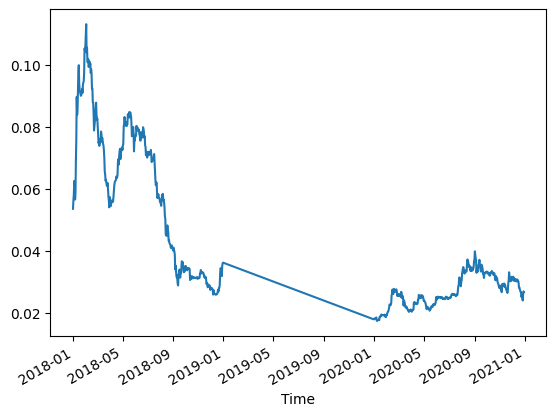

In [11]:
df["Open"].plot()

In [32]:
import ccxt
import calendar
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta


exchange = ccxt.mercado()

def min_ohlcv(dt, pair, limit):
    # UTC native object
    since = calendar.timegm(dt.utctimetuple())*1000
    ohlcv1 = exchange.fetch_ohlcv(symbol=pair, timeframe='1m', since=since, limit=limit)
    ohlcv2 = exchange.fetch_ohlcv(symbol=pair, timeframe='1m', since=since, limit=limit)
    ohlcv = ohlcv1 + ohlcv2
    return ohlcv

def ohlcv(dt, pair, period='1d'):
    ohlcv = []
    limit = 1000
    if period == '1m':
        limit = 720
    elif period == '1d':
        limit = 365
    elif period == '1h':
        limit = 24
    elif period == '5m':
        limit = 288
    for i in dt:
        start_dt = datetime.strptime(i, "%Y%m%d")
        since = calendar.timegm(start_dt.utctimetuple())*1000
        if period == '1m':
            ohlcv.extend(min_ohlcv(start_dt, pair, limit))
        else:
            ohlcv.extend(exchange.fetch_ohlcv(symbol=pair, timeframe=period, since=since, limit=limit))
    df = pd.DataFrame(ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
    df['Open'] = df['Open'].astype(np.float64)
    df['High'] = df['High'].astype(np.float64)
    df['Low'] = df['Low'].astype(np.float64)
    df['Close'] = df['Close'].astype(np.float64)
    df['Volume'] = df['Volume'].astype(np.float64)
    df.set_index('Time', inplace=True)
    return df

dt = ['20160101', '20230101']
df = ohlcv(dt, 'BTC/BRL', '1d')

In [13]:
start_dt = datetime.strptime('2010101', "%Y%m%d")
print(start_dt)
since = calendar.timegm(start_dt.utctimetuple())*1000
print(since)

2010-10-01 00:00:00
1285891200000


ace ['ADA/TWD', 'APE/TWD', 'ARB/TWD', 'BAAS/TWD', 'BNB/TWD', 'BTC/TWD', 'DEC/TWD', 'DET/TWD', 'DOGE/TWD', 'DOT/TWD', 'DS/TWD', 'ETH/TWD', 'FTM/TWD', 'GALA/TWD', 'HT/TWD', 'LTC/TWD', 'MATIC/TWD', 'MOCT/TWD', 'QQQ/TWD', 'SAND/TWD', 'SHIB/TWD', 'SOL/TWD', 'SSV/TWD', 'TRX/TWD', 'UNIC/TWD', 'USDC/TWD', 'USDT/TWD', 'WOO/TWD', 'XRP/TWD', 'ACEX/USDT', 'ADA/USDT', 'ANKR/USDT', 'APE/USDT', 'AVAX/USDT', 'AXS/USDT', 'BNB/USDT', 'BTC/USDT', 'CHZ/USDT', 'DOGE/USDT', 'DOT/USDT', 'DYDX/USDT', 'ETH/USDT', 'FTM/USDT', 'GALA/USDT', 'LINK/USDT', 'LTC/USDT', 'MATIC/USDT', 'SAND/USDT', 'SHIB/USDT', 'SOL/USDT', 'TRX/USDT', 'WOO/USDT', 'XRP/USDT', 'YFI/USDT', 'ETH/BTC']
alpaca ['XTZ/USDC', 'MKR/USDC', 'DOT/USDC', 'ETH/USDC', 'LINK/USDC', 'UNI/USD', 'UNI/USDC', 'UNI/USDT', 'GRT/USDC', 'BTC/USD', 'LTC/BTC', 'LTC/USD', 'LTC/USDT', 'BCH/USDC', 'XTZ/USD', 'AAVE/USDT', 'BAT/USDC', 'YFI/USD', 'DOT/USD', 'DOGE/USDT', 'BAT/USD', 'AVAX/USDT', 'MKR/USD', 'BTC/USDC', 'BTC/USDT', 'CRV/USDC', 'BCH/BTC', 'BCH/USD', 'BCH/USD
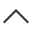

In [155]:
#pairs of each exchange
ex_pairs = {}
for ex in ccxt.exchanges:
    try:
        exchange = getattr(ccxt, ex)()
        markets = exchange.load_markets()
        pairs = list(markets.keys())
        ex_pairs[ex] = pairs
        print(ex, pairs)
    except Exception as e:
        print(e)


ace does not have market symbol BTC/USD
ace requires "apiKey" credential
alpaca {"code":42910000,"message":"rate limit exceeded"}
alpaca {"code":42910000,"message":"rate limit exceeded"}
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
bequant {"timestamp":"2023-09-17T20:15:48.766Z","error":{"description":"Validation error. Please, check request parameters and try again.","code":10001,"message":"Bad request parameter [limit]. Parameter must be in [1, 1000]"},"path":"/api/3/public/candles?symbols=BTCUSD&period=D1&from=2009-01-01T00%3A00%3A00.000Z&limit=6000","requestId":"ecf2f555-2625378"}
bequant : 200, 2023-03-01 21:00:00, 2023-09-16 21:00:00
bigone does not have market symbol BTC/USD
index 0 is out of bounds for axis 0 with size 0
binance {"code":-4088,"msg":"Maximum time interval is 200 days."}
binance : 2223, 2017-08-16 21:00:00, 2023-09-16 21:00:00
binancecoinm {"code":-4088,"msg":"Maximum time interval is 200 days."}
binancecoinm doe
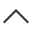
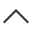

In [150]:
#função certa, ótima
start_dt = datetime.strptime('20090101', "%Y%m%d")
since = calendar.timegm(start_dt.utctimetuple())*1000

dict_exchanges = {}

for ex in ccxt.exchanges:
    try:
        exchange = getattr(ccxt, ex)()
        lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/USD", timeframe="1d", since=since, limit=6000)
        # do what you want with this exchange
        # pprint(dir(exchange))

        df = pd.DataFrame(lista_ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
        df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
        df['Open'] = df['Open'].astype(np.float64)
        df['High'] = df['High'].astype(np.float64)
        df['Low'] = df['Low'].astype(np.float64)
        df['Close'] = df['Close'].astype(np.float64)
        df['Volume'] = df['Volume'].astype(np.float64)
        df.set_index('Time', inplace=True)
        print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")
        dict_exchanges[ex] = df
        
    except Exception as e:
        print(e)
        # try the 200 day function
        try:
            df = get_ohlcv_200_days(exchange)
            print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")
            dict_exchanges[ex] = df
        except Exception as e:
            print(e)
    
    

In [179]:
#delete the bittrex and ndax exchanges (error in data)
del dict_exchanges['bittrex']
del dict_exchanges['ndax']
del dict_exchanges['bitfinex2'] #repeted data from bitfinex
dict_exchanges

{'binance':                          Open      High       Low     Close        Volume
 Time                                                                     
 2017-08-16 21:00:00   4261.48   4485.39   4200.74   4285.08    795.150377
 2017-08-17 21:00:00   4285.08   4371.52   3938.77   4108.37   1199.888264
 2017-08-18 21:00:00   4108.37   4184.69   3850.00   4139.98    381.309763
 2017-08-19 21:00:00   4120.98   4211.08   4032.62   4086.29    467.083022
 2017-08-20 21:00:00   4069.13   4119.62   3911.79   4016.00    691.743060
 ...                       ...       ...       ...       ...           ...
 2023-09-12 21:00:00  25840.10  26405.22  25764.17  26222.00  31610.827530
 2023-09-13 21:00:00  26222.00  26860.49  26126.77  26522.73  38333.172500
 2023-09-14 21:00:00  26522.73  26888.00  26224.00  26600.00  26227.293690
 2023-09-15 21:00:00  26599.99  26777.00  26445.00  26559.67  13960.933510
 2023-09-16 21:00:00  26559.67  26623.25  26416.16  26503.99  10858.595740
 
 [2223 rows 

In [180]:
#delete the exchanges that have less than 365 days of data (one year)
for ex in list(dict_exchanges.keys()):
    if len(dict_exchanges[ex]) < 365:
        del dict_exchanges[ex]
len(dict_exchanges.keys())

19

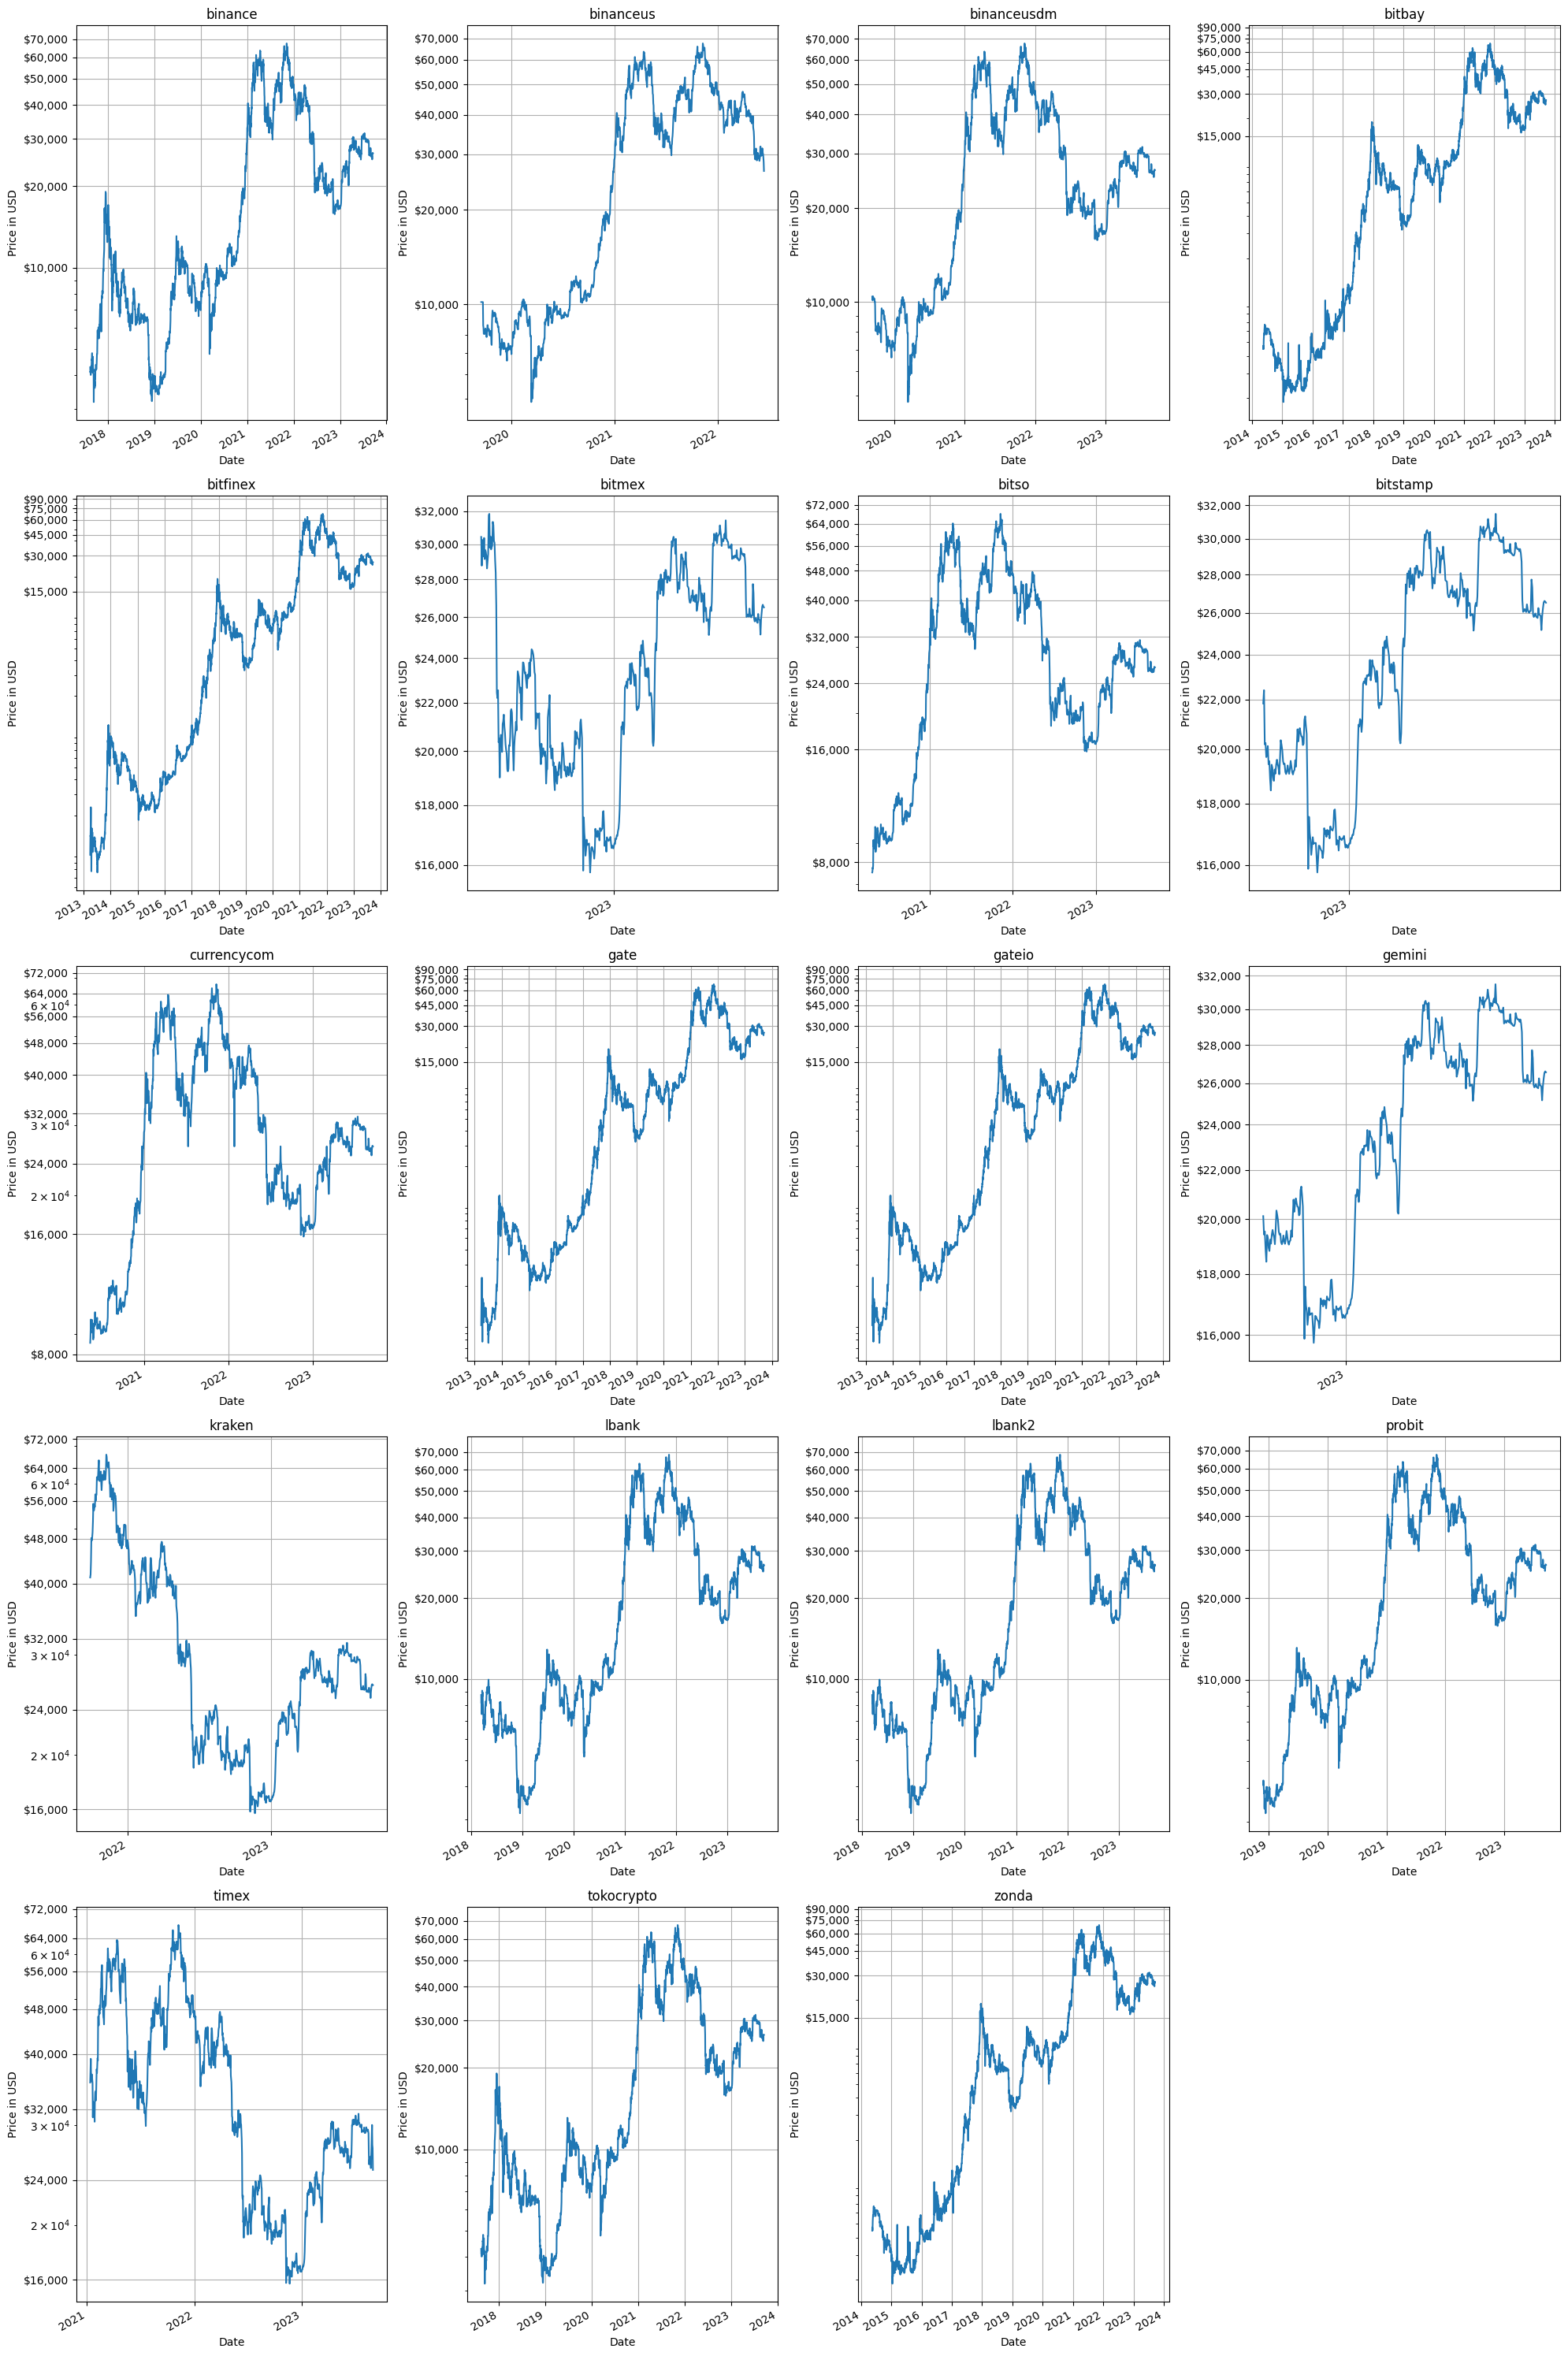

In [209]:
#Create a figure with all the exchanges as subplots, log in y axis and usd in y axis and date in x axis
fig, axs = plt.subplots(5, 4, figsize=(20, 30))
axs = axs.ravel()
for i, (k, v) in enumerate(dict_exchanges.items()):
    v["Close"].plot(ax=axs[i], logy=True, title=k)
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Price in USD")
    axs[i].grid()
    #x axis only showing the year, not the month nor the day, only like 2010, 2011, etc
    axs[i].xaxis.set_major_locator(mdates.YearLocator())

    #y axis in dollars
    axs[i].yaxis.set_major_locator(plt.MaxNLocator(9))
    #set the y axis in dollars
    axs[i].yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

#hide the last plot
axs[19].set_visible(False)

    
plt.tight_layout()
plt.show()


    

/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: 

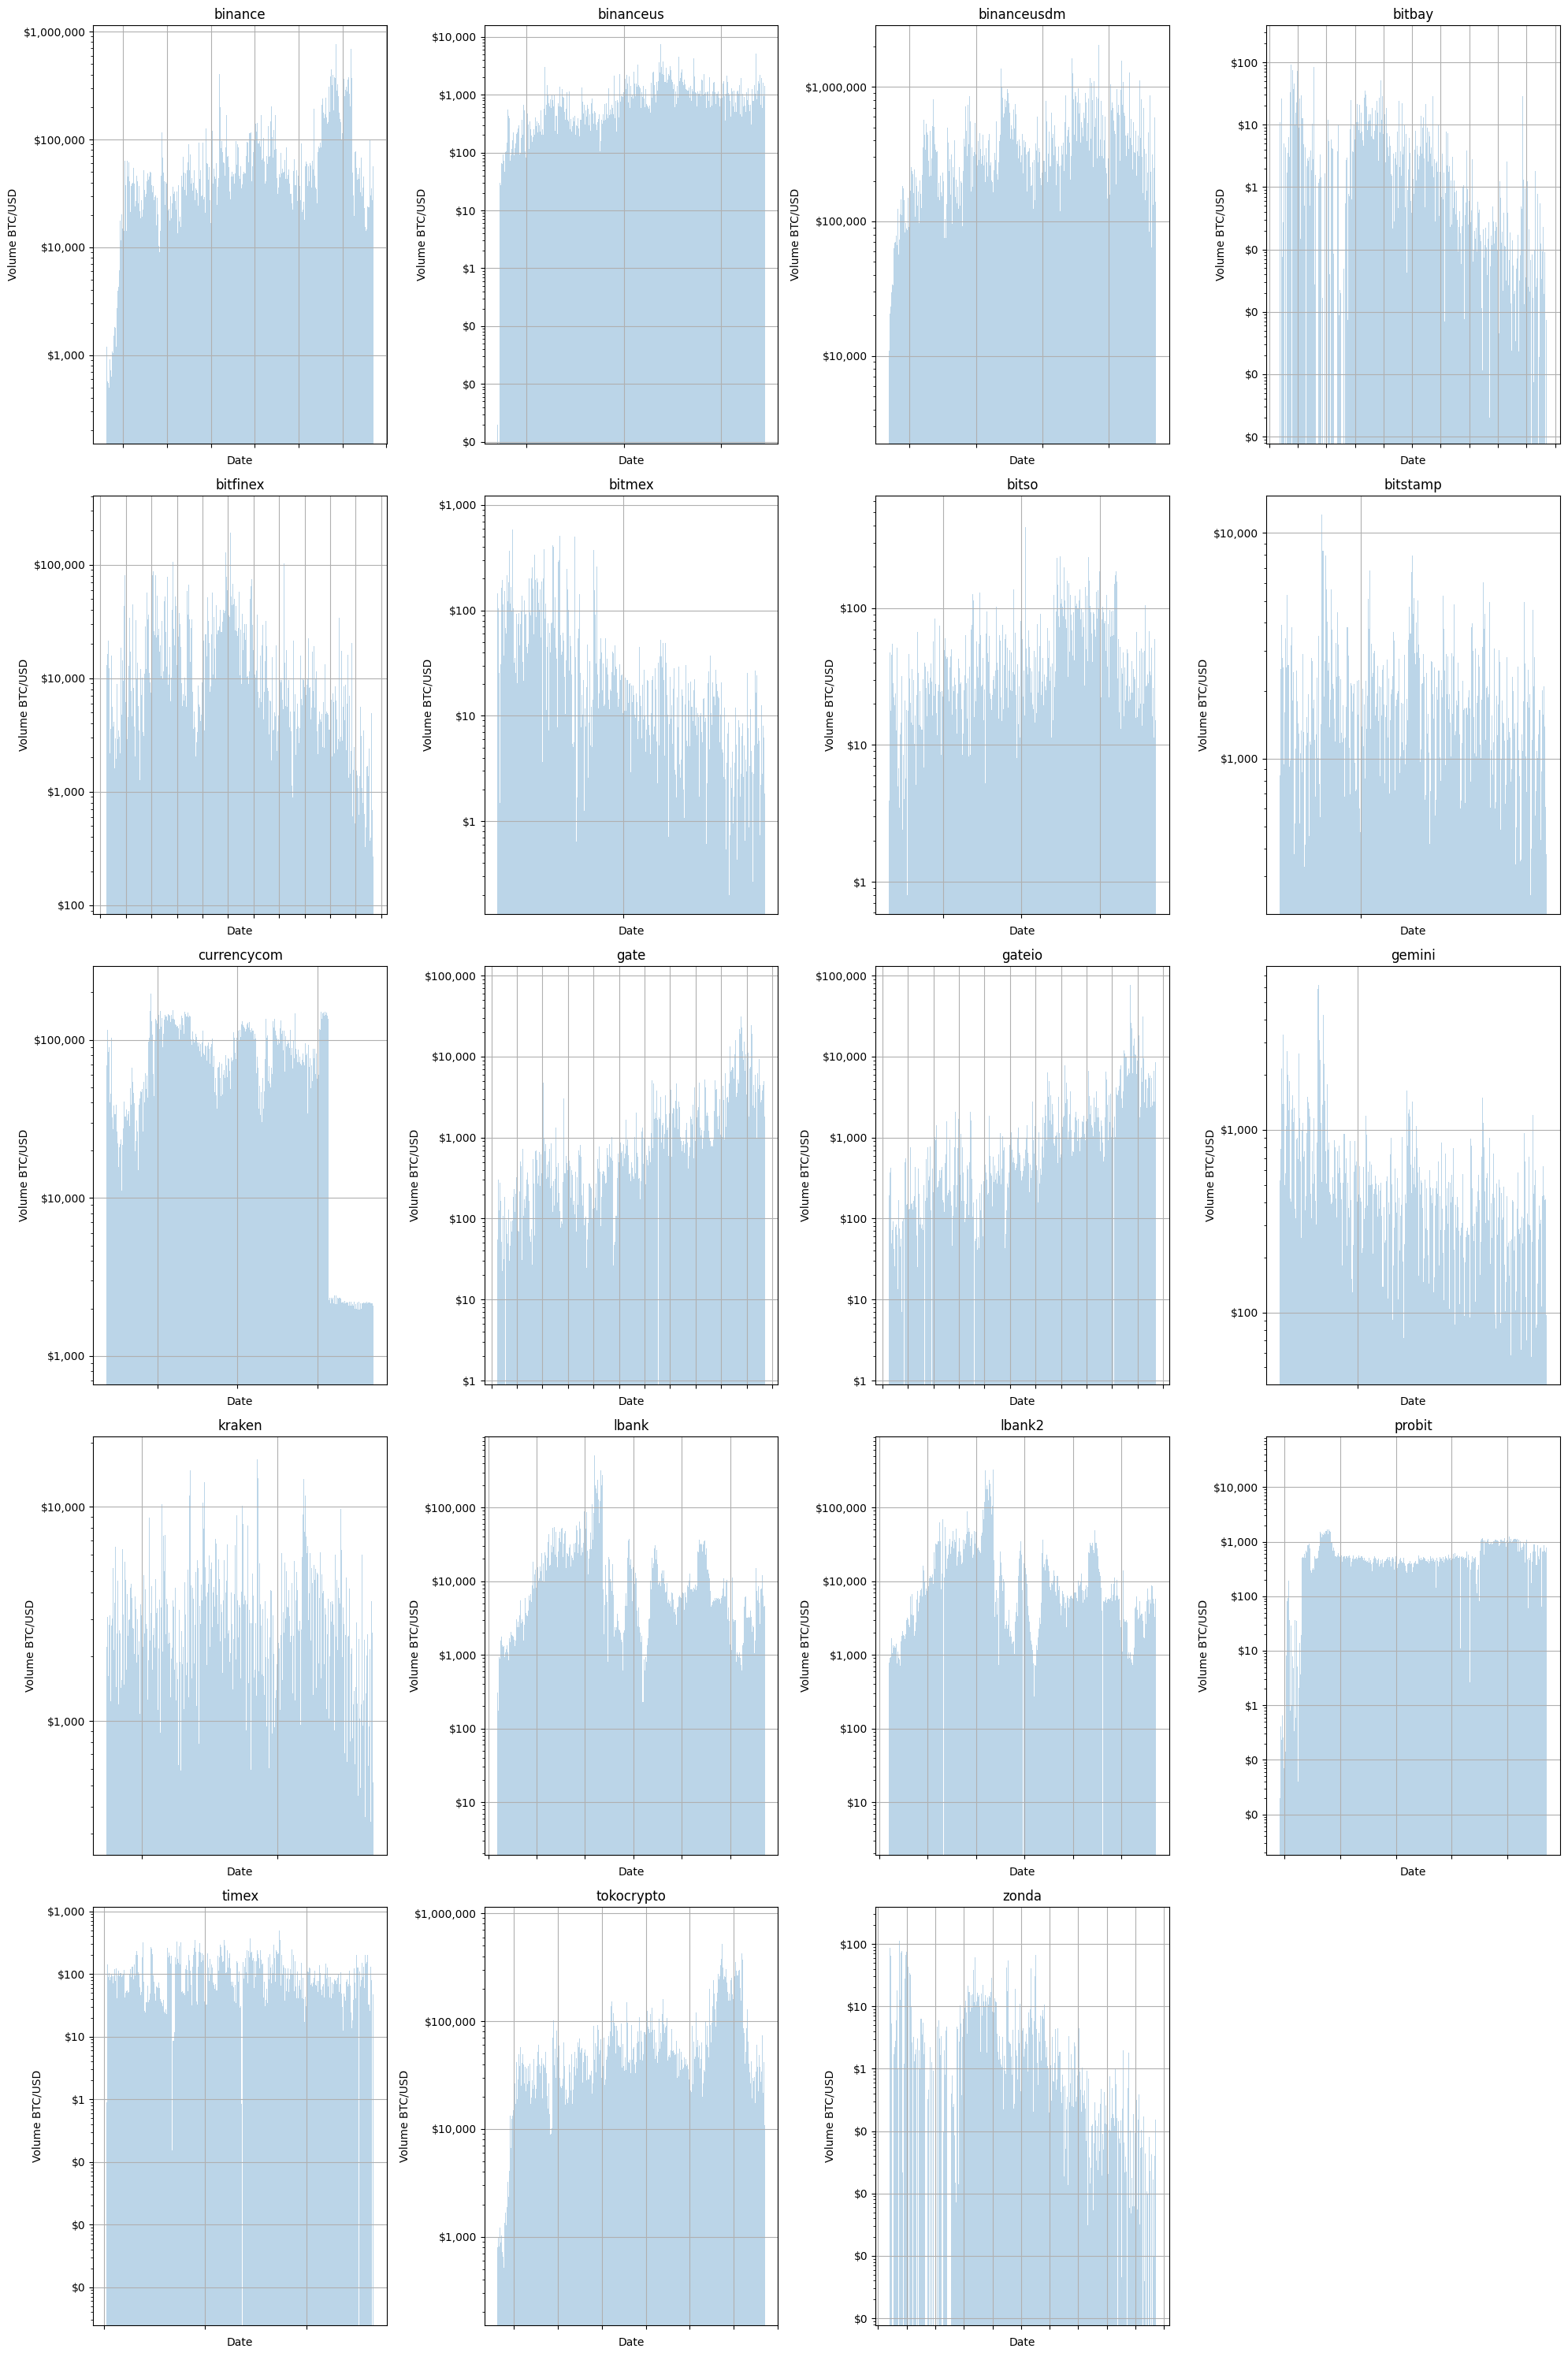

In [210]:

#Create a figure with all the exchanges as subplots, log in y axis and usd in y axis and date in x axis
fig, axs = plt.subplots(5, 4, figsize=(20, 30))
axs = axs.ravel()
for i, (k, v) in enumerate(dict_exchanges.items()):
    #title
    axs[i].set_title(k)
    axs[i].bar(v.index, v["Volume"], alpha=0.3, width=1, label="Volume")
    axs[i].set_ylabel("Volume BTC/USD")
    axs[i].set_yscale("log")
    axs[i].yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
    axs[i].grid(which='major', axis='x', linestyle='-')
    axs[i].grid(which='minor', axis='x', linestyle=':')
    axs[i].grid(which='major', axis='y', linestyle='-')
    axs[i].set_xlabel("Date")
    
    #x axis only showing the year, not the month nor the day, only like 2010, 2011, etc
    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

    #y axis in dollars
    #axs[i].yaxis.set_major_locator(plt.MaxNLocator(5))

#hide the last plot
axs[19].set_visible(False)

plt.tight_layout()
plt.show()


    

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7fc16a165c20>
Traceback (most recent call last):
  File "/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/matplotlib/transforms.py", line 222, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt


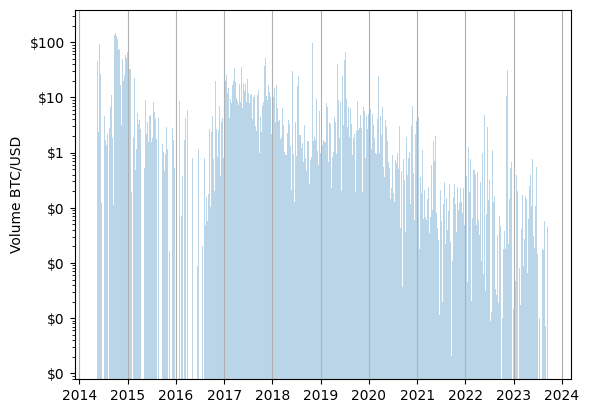

In [201]:
#plot volume in another axis with bar plot and alpha 0.5
ax = plt.gca()
ax.bar(v.index, v["Volume"], alpha=0.3, width=1, label="Volume")
ax.set_ylabel("Volume BTC/USD")
ax.set_yscale("log")
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
ax.grid(which='major', axis='x', linestyle='-')
ax.grid(which='minor', axis='x', linestyle=':')
#ax2.set_ylim(0, 1000000000)


#plot legend 
#plt.legend(loc="upper right", labels=["Volume"])


In [92]:
exchange = ccxt.mercado()
lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/BRL", timeframe="1d", since=since, limit=10000)

In [69]:
#bitstamp one of the osdest exchanges
start_dt = datetime.strptime('20111001', "%Y%m%d")
since = calendar.timegm(start_dt.utctimetuple())*1000
exchange = ccxt.bitstamp()
lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/USD", timeframe="1d", since=since, limit=3000)
len(lista_ohlcv)

1000